# Work in progress (WIP)

# 00b. Guessing the number of marbles in a vase

In [1]:
# Specific install for Kaggle Notebooks environment
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# Kaleido is used to convert Plotly to static png
!pip install -Uqq kaleido
!pip install -Uqq skq

In [2]:
import numpy as np
from skq.circuits import Grover

import plotly.graph_objects as go

# Fix Plotly rendering in Jupyter forks.
# If you are running this notebook locally you can comment this out.
# This allows you to play with interactive Plotly plots.
import plotly.io as pio
pio.renderers.default = 'png'

This notebook intends to give you a high-level overview of a practical problem where we can gain an advantage over classical algorithms using a quantum algorithm.


Imagine your friend has a vase with marbles hidden inside a closet. You can have unlimited guesses. Each time you guess you friend will tell you if it is the right answer or not.

Classically you would start going through all the options. $0, 1, 2,$ etc. You will end up guessing $n$ times, where $n$ is the number of marbles in the vase. What if I told you that with a quantum algorithm we can guess the number of marbles with only $\sqrt{n}$ guesses? That is if your friend is part of the quantum algorithm.

We can achieve this speedup by implementing **Grover's algorithm**. where your friend functions as a **phase oracle**.

In [3]:
n_qubits = 8
# Generate random qubit state
target_state = np.zeros((2**n_qubits))
random_index = np.random.randint(2**n_qubits)
target_state[random_index] = 1

In [4]:
target_decimal = np.argmax(target_state)
print(f"Number of marbles in the vase: '{target_decimal}'")

Number of marbles in the vase: '132'


In [5]:
grover = Grover().get_grover_circuit(n_iterations=6, n_qubits=n_qubits, target_state=target_state)
result = grover(np.array([1]+[0]*(len(target_state)-1)))

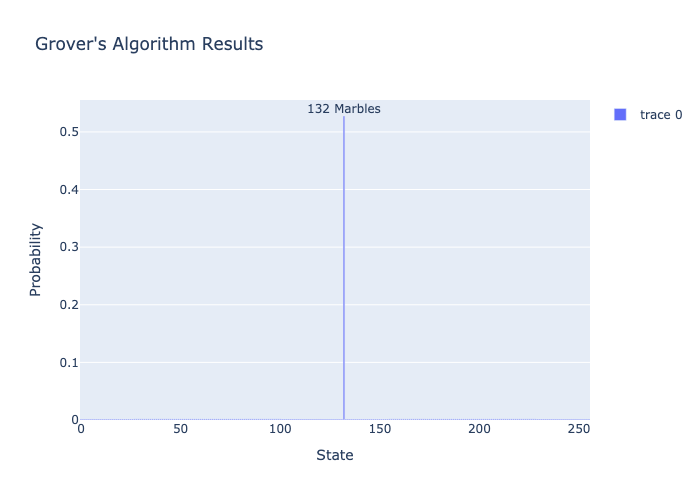

In [6]:
max_idx = np.argmax(result)
max_val = result[max_idx]

fig = go.Figure(data=[
    go.Bar(x=list(range(len(result))), y=result),
    go.Scatter(
        x=[max_idx],
        y=[max_val],
        mode='text',
        text=[f'{max_idx:.0f} Marbles'],
        textposition='top center',
        marker=dict(color='green'),
        showlegend=False
    )
])
fig.update_layout(
    title="Grover's Algorithm Results", 
    xaxis_title="State",
    yaxis_title="Probability"
)
fig.show()

In [7]:
print(f"Guessed number of marbles: '{np.argmax(result.round())}'")
print(f"Number of marbles in the vase: '{target_decimal}'")
print(f"Answer is {'correct' if np.argmax(result.round()) == target_decimal else 'incorrect'}!")

Guessed number of marbles: '132'
Number of marbles in the vase: '132'
Answer is correct!


# TODO: Show how to run on real Qiskit quantum computer

In [8]:
qc = grover.convert(framework="qiskit")
qc

Congratulations you just leverages the power of quantum computing to solve a real problem! Intrigued? Then this course is for you! The mechanisms behind Grover's algorithm is discussed in notebook 5, but I would recommend you first start learning more about qubits in notebook 1. By going through the notebooks you will be able to gain a solid understanding of how these quantum algorithms work and you will be able to implement your own algorithms.

# Work in progress (WIP)

# Work in progress (WIP)